# 문제 풀어보기. (50분 기준으로 마지막 문제 못풀었습니다.)

In [1]:
import os
os.environ["WANDB_MODE"] = "offline"

In [2]:
import pandas as pd
import numpy as np
import datasets 
import transformers
import torch
import torch.utils
import PIL.Image
import io

# 1. `imdb`

아래의 코드를 실행하여 `model`, `imdb` 을 불러오라. 

In [14]:
model = transformers.AutoModelForSequenceClassification.from_pretrained(
    "distilbert/distilbert-base-uncased", num_labels=2
)
tokenizer = transformers.AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")
spam = datasets.load_dataset('guebin/spam-tiny')['train'].train_test_split(test_size=0.2)
spam

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DatasetDict({
    train: Dataset({
        features: ['sms', 'label'],
        num_rows: 8
    })
    test: Dataset({
        features: ['sms', 'label'],
        num_rows: 2
    })
})

In [16]:
imdb = datasets.load_dataset("guebin/imdb-tiny")
tokenizer = transformers.AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)
imdb = imdb.map(preprocess_function,batched=True)

`???`에 적절한 `collate_fn` 을 설계하여 아래의 코드를 완성하라.

In [17]:
imdb['train']

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 10
})

In [25]:
def collate_fn(single_batch):
    collated_data = dict()
    collated_data['input_ids'] = torch.nn.utils.rnn.pad_sequence([torch.tensor(dct['input_ids']) for dct in single_batch]).t()    
    collated_data['attention_mask'] = torch.nn.utils.rnn.pad_sequence([torch.tensor(dct['attention_mask']) for dct in single_batch]).t()
    collated_data['labels'] = torch.tensor([dct['label'] for dct in single_batch])
    return collated_data

In [26]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert/distilbert-base-uncased", num_labels=2
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


```Python
trainer = transformers.Trainer(
    model=model,
    data_collator=???,
    train_dataset=imdb['train']
)
trainer.train()
```

In [27]:
trainer = transformers.Trainer(
    model=model,
    data_collator=collate_fn,
    train_dataset=imdb['train']
)
trainer.train()

Step,Training Loss


TrainOutput(global_step=6, training_loss=0.42235978444417316, metrics={'train_runtime': 2.4946, 'train_samples_per_second': 12.026, 'train_steps_per_second': 2.405, 'total_flos': 3663551494080.0, 'train_loss': 0.42235978444417316, 'epoch': 3.0})

**제약사항**

1. `DataCollatorWithPadding`을 사용하지 말고 수동구현 할 것
2. `batch_maker`를 이용한 검증코드를 제시할 것 

# 2. `Food101`

> (1)번 20점, (2)번 40점

`(1)` 아래의 코드를 실행하여 `food_pandas` 를 불러오라. 

In [360]:
food_pandas = pd.read_parquet("hf://datasets/guebin/food101-tiny/data/train-00000-of-00001.parquet")

`food_pandas`를 활용하여 아래와 같은 `food`를 만들어라. 

In [361]:
import pandas as pd
from datasets import Dataset, DatasetDict

In [362]:
food_pandas.to_dict()['image']

{0: {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe1\x01\x12Exif\x00\x00II*\x00\x08\x00\x00\x00\r\x002\x01\x02\x00\x14\x00\x00\x00\xaa\x00\x00\x00\x10\x01\x02\x00\n\x00\x00\x00\xbe\x00\x00\x00\x12\x01\x03\x00\x01\x00\x00\x00\x00\x00\x00\x00\t\x92\x03\x00\x01\x00\x00\x00\x01\x00\x00\x002\x01\x02\x00\x14\x00\x00\x00\xc8\x00\x00\x00\x08\x92\x03\x00\x01\x00\x00\x00\x00\x00\x00\x00\x03\xa4\x03\x00\x01\x00\x00\x00\x00\x00\x00\x00\x07\x92\x03\x00\x01\x00\x00\x00\xff\xff\xff\xff\x01\x01\x03\x00\x01\x00\x00\x00 \x03\x00\x00\n\x92\x05\x00\x01\x00\x00\x00\xdc\x00\x00\x00\x00\x01\x03\x00\x01\x00\x00\x00X\x02\x00\x00\x0f\x01\x02\x00\x08\x00\x00\x00\xe4\x00\x00\x00i\x87\x04\x00\x01\x00\x00\x00\xec\x00\x00\x00\x00\x00\x00\x002012:12:20 19:36:38\x00SCH-I535\x00\x002012:12:20 19:36:31\x00r\x01\x00\x00d\x00\x00\x00SAMSUNG\x00\x02\x00\x01\x02\x04\x00\x01\x00\x00\x00\n\x01\x00\x00\x02\x02\x04\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xdb\x00C\x00\x05\x03\x04

In [363]:
food_pandas1 = Dataset.from_pandas(food_pandas)

In [364]:
food_pandas1

Dataset({
    features: ['image', 'label'],
    num_rows: 10
})

In [365]:
food_pandas1[0]

{'image': {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe1\x01\x12Exif\x00\x00II*\x00\x08\x00\x00\x00\r\x002\x01\x02\x00\x14\x00\x00\x00\xaa\x00\x00\x00\x10\x01\x02\x00\n\x00\x00\x00\xbe\x00\x00\x00\x12\x01\x03\x00\x01\x00\x00\x00\x00\x00\x00\x00\t\x92\x03\x00\x01\x00\x00\x00\x01\x00\x00\x002\x01\x02\x00\x14\x00\x00\x00\xc8\x00\x00\x00\x08\x92\x03\x00\x01\x00\x00\x00\x00\x00\x00\x00\x03\xa4\x03\x00\x01\x00\x00\x00\x00\x00\x00\x00\x07\x92\x03\x00\x01\x00\x00\x00\xff\xff\xff\xff\x01\x01\x03\x00\x01\x00\x00\x00 \x03\x00\x00\n\x92\x05\x00\x01\x00\x00\x00\xdc\x00\x00\x00\x00\x01\x03\x00\x01\x00\x00\x00X\x02\x00\x00\x0f\x01\x02\x00\x08\x00\x00\x00\xe4\x00\x00\x00i\x87\x04\x00\x01\x00\x00\x00\xec\x00\x00\x00\x00\x00\x00\x002012:12:20 19:36:38\x00SCH-I535\x00\x002012:12:20 19:36:31\x00r\x01\x00\x00d\x00\x00\x00SAMSUNG\x00\x02\x00\x01\x02\x04\x00\x01\x00\x00\x00\n\x01\x00\x00\x02\x02\x04\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xdb\x00C\x00\x05\x

In [366]:
binary_data = food_pandas1['image'][0]['bytes']
image = PIL.Image.open(io.BytesIO(binary_data))

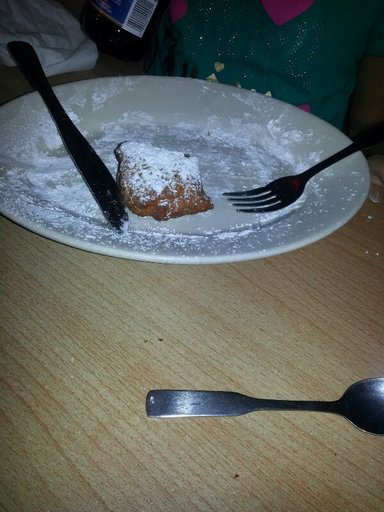

In [367]:
image

In [368]:
import io
from PIL import Image


In [369]:
def m_transform(example):

    # 이미지 바이트 데이터를 읽어서 PIL.Image 객체 생성
    binary_data = example['image']['bytes']
    image = Image.open(io.BytesIO(binary_data))

    # 'PILImage' 필드에 이미지 객체 추가
    example['PILImage'] = image

    return example

In [370]:
food = food_pandas1.map(m_transform)

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

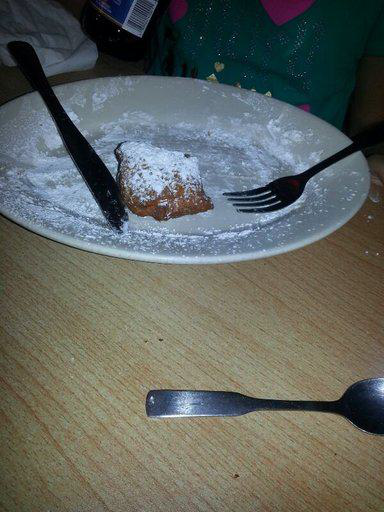

In [371]:
food[0]['PILImage']

**hint**: 아래의 코드를 관찰하라.

```Python
binary_data = food['image'][0]['bytes']
image = PIL.Image.open(io.BytesIO(binary_data))
```

`(2)` 아래의 코드를 실행하여 `model`과 `image_processor`를 불러오라.

In [ ]:
# 실패

In [372]:
food

Dataset({
    features: ['image', 'label', 'PILImage'],
    num_rows: 10
})

In [373]:
model = transformers.AutoModelForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k",
    num_labels=101
)
image_processor = transformers.AutoImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


In [374]:
image_processor

ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

`image_processor` 를 이용하여 (1)에서 만든 `food`의 이미지를 전처리하고, `???`에 적절한 `data_collator` 혹은 `collate_fn` 을 설계하여 아래의 코드를 완성하라.

```Python
trainer = transformers.Trainer(
    model=model,
    data_collator=???,
    train_dataset=food
)
trainer.train()
```

**제약사항**

1. `food`에 추가적인 전처리를 하지 말 것. (`food.map()`, `food.with_transform()`을 하지 말 것)
2. `image_processor` 이외의 방법으로 전처리 하지 말 것. (즉 `torchvision.transform`의 기능을 이용하지 말 것)
3. `batch_maker`를 이용한 검증코드를 제시할 것 

In [376]:
food['PILImage']

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=384x512>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x383>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x348>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x306>]

In [ ]:
image_processor = transformers.AutoImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")
normalize = torchvision.transforms.Normalize(mean=image_processor.image_mean, std=image_processor.image_std)
size = (
    image_processor.size["shortest_edge"]
    if "shortest_edge" in image_processor.size
    else (image_processor.size["height"], image_processor.size["width"])
)
_transforms = torchvision.transforms.Compose([
    torchvision.transforms.RandomResizedCrop(size), 
    torchvision.transforms.ToTensor(), 
    normalize
])
def transforms(examples):
    examples["pixel_values"] = [_transforms(img.convert("RGB")) for img in examples["image"]]
    del examples["image"]
    return examples
trainer_input = food['train'].with_transform(transforms)
trainer_input

In [377]:
trainer_input = food
#---#~
batch_maker = transformers.Trainer(
    model = model,
    data_collator = lambda x: x
) # 이 과정에서 model이 cuda로 감 
_batched_data = batch_maker.get_test_dataloader(trainer_input) # 이 과정에서 trainer_input이 cuda로 감
batched_data = list(_batched_data)
single_batch = batched_data[-1]
model.to("cpu") # 경우에 따라 생략해야할수도있음
model(**data_collator(single_batch))

KeyError: 'image'

In [ ]:
trainer = transformers.Trainer(
    model=model,
    data_collator=collate_fn,
    train_dataset=food
)
trainer.train()